In [1]:
"""
HCC Survival Prediction - Initial Data Inspection
================================================
Purpose: Load dataset and perform initial quality assessment
Author: Vijayanand Jeeva
Date: 16/2/2026

Environment:
- Python 3.x
- pandas 2.2.2
- numpy 1.26.4
- scikit-learn 1.4.2
"""

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Display settings for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', None)

# Plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("=" * 60)
print("SETUP COMPLETE")
print("=" * 60)
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Libraries imported successfully")
print("=" * 60)

SETUP COMPLETE
Pandas version: 2.2.2
NumPy version: 1.26.4
Matplotlib version: 3.8.4
Seaborn version: 0.13.2
Libraries imported successfully


In [3]:
# print working directory
import os
print(f"Current working directory: {os.getcwd()}") # Make sure this is hcc-survival-prediction/notebooks

Current working directory: /mnt/c/Users/vijay/OneDrive/Desktop/Projects/hcc-survival-prediction/notebooks


In [4]:
print("=" * 60)
print("LOAD DATASET")
print("=" * 60)

data_path = "../data/hcc-data.csv"

# Read in CSV ("?" is the missing value indicator)
df = pd.read_csv(data_path, na_values = ["?"])

print(f"Verification of dimensions:")
print(f"\n  Dataset loaded from: {data_path}")
nrows, ncols = df.shape[0], df.shape[1]

if (nrows == 165 and ncols == 50):
    print(f"    Dataset Shape: {nrows} rows x {ncols} columns")
    print(f"    Memory Usage: {df.memory_usage(deep = True).sum() / 1024:.2f} KB")
else:
    print(f"    Wrong dimensions of data: Got {(nrows, ncols)}")
    print(f"    Check file path again")

LOAD DATASET
Verification of dimensions:

  Dataset loaded from: ../data/hcc-data.csv
    Dataset Shape: 165 rows x 50 columns
    Memory Usage: 64.58 KB


In [6]:
print("=" * 60)
print("DATASET STRUCTURE OVERVIEW")
print("=" * 60)

# Data types summary
print(f"\nData Types:")
print(df.dtypes) # features with missing values are read as floats, even if they are categorical. 
# This is because pandas uses NaN to represent missing values, and NaN is a float.
# Dtypes like Int64 can be used to allow for missing values in integer columns
# Columns can also be converted to categorical types even with missing values, but this requires explicit conversion after loading the data.
dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"    {dtype}: {count} columns")
print()

# Column names check (according to the original paper)
EXPECTED_COLUMNS = ["Gender", "Age", "Alcohol", "HBsAg", "HBeAg", "HBcAb", "HCVAb", 
                    "Cirrhosis", "Endemic", "Smoking", "Diabetes", "Obesity", "Hemochro",
                    "AHT", "CRI", "HIV", "NASH", "Varices", "Spleno", "PHT", "PVT", "Metastasis",
                    "Hallmark", "Age", "Grams/day", "Packs/year", "PS", "Ascites", "INR", "AFP",
                    "Hemoglobin", "MCV", "Leucocytes", "Platelets", "Albumin", "Total Bil", "ALT",
                    "AST", "GGT", "ALP", "TP", "Creatinine", "Nodules", "Major Dim", "Dir. Bil",
                    "Iron", "Sat", "Ferritin", "Class"]
column_issues = []

for col in EXPECTED_COLUMNS:
    if col not in df.columns:
        column_issues.append(f"{col} missing")
if not column_issues:
    print(f"\nColumn names match expected list")
else:
    print(f"\nColumn name issues found:")
    for issue in column_issues:
        print(f"    {issue}")
print()

print(f"Columns containing '_': {df.columns[df.columns.str.contains("_")].tolist()}")
 # total and direct bilirubin labelled as Total_Bil and Dir_Bil
 # Grams/day and Packs/year labelled as Grams_day and Packs_year
 # Major Dim labelled as Major_Dim
print()

print(f"Columns containing Nodule: {df.columns[df.columns.str.contains('Nodule')].tolist()}") # Nodules column wrongly labelled as Nodule
# What should be done later: Rename Nodule to Nodules
# df = df.rename(columns = {
#      "Nodule": "Nodules"
#  })

# Missing data overview
total_cells = nrows * ncols - 1 * nrows  # This is done to account for the extra cells due to the class column.
total_missing = df.isnull().sum().sum()
missing_pct = total_missing / total_cells * 100

print(f"Missing Data Overview:")
print(f"    Total feature cells: {total_cells:,}")
print(f"    Missing cells: {total_missing:,}")
print(f"    Missing percentage: {missing_pct:.2f}%")

if np.abs(missing_pct - 10.22) < 1:
    print(f"\n    Status: Matches expected missing percentages")
else:
    print(f"    Status: Different from expected missing percentages")


# Show first few rows
print("\n" + "=" * 60)
print("FIRST 3 ROWS")
print("=" * 60)
display(df.head(3))

# Column list
print("\n" + "=" * 60)
print(f"ALL COLUMNS ({len(df.columns)})")
print("=" * 60)
print(f"{', '.join(df.columns.tolist())}")

print("=" * 60)

DATASET STRUCTURE OVERVIEW

Data Types:
Gender              int64
Symptoms          float64
Alcohol             int64
HBsAg             float64
HBeAg             float64
HBcAb             float64
HCVAb             float64
Cirrhosis           int64
Endemic           float64
Smoking           float64
Diabetes          float64
Obesity           float64
Hemochro          float64
AHT               float64
CRI               float64
HIV               float64
NASH              float64
Varices           float64
Spleno            float64
PHT               float64
PVT               float64
Metastasis        float64
Hallmark          float64
Age                 int64
Grams_day         float64
Packs_year        float64
PS                  int64
Encephalopathy    float64
Ascites           float64
INR               float64
AFP               float64
Hemoglobin        float64
MCV               float64
Leucocytes        float64
Platelets         float64
Albumin           float64
Total_Bil         float6

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0.000,1,0.000,0.000,0.000,0.000,1,0.000,1.000,1.000,NaN,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,67,137.000,15.000,0,1.000,1.000,1.530,95.000,13.700,106.600,4.900,99.000,3.400,2.100,34.000,41.000,183.000,150.000,7.100,0.700,1.000,3.500,0.500,NaN,NaN,NaN,1
1,0,NaN,0,0.000,0.000,0.000,1.000,1,NaN,NaN,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,62,0.000,NaN,0,1.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,1.800,NaN,NaN,NaN,NaN,1
2,1,0.000,1,1.000,0.000,1.000,0.000,1,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,78,50.000,50.000,2,1.000,2.000,0.960,5.800,8.900,79.800,8.400,472.000,3.300,0.400,58.000,68.000,202.000,109.000,7.000,2.100,5.000,13.000,0.100,28.000,6.000,16.000,1



ALL COLUMNS (50)
Gender, Symptoms, Alcohol, HBsAg, HBeAg, HBcAb, HCVAb, Cirrhosis, Endemic, Smoking, Diabetes, Obesity, Hemochro, AHT, CRI, HIV, NASH, Varices, Spleno, PHT, PVT, Metastasis, Hallmark, Age, Grams_day, Packs_year, PS, Encephalopathy, Ascites, INR, AFP, Hemoglobin, MCV, Leucocytes, Platelets, Albumin, Total_Bil, ALT, AST, GGT, ALP, TP, Creatinine, Nodule, Major_Dim, Dir_Bil, Iron, Sat, Ferritin, Class


TARGET VARIABLE ANALYSIS: Class

Basic Information:
    Data type: int64
    Unique values: [0, 1]
    Missing values: 0

CLASS DISTRIBUTION

Percentages:
    Class 0 (Dies ):  63 (38.18%)
    Class 1 (Lives): 102 (61.82%)
    Total:           165

Class Imbalance Analysis:
    Ratio (Lives: Dies): 1.62:1
    Expected: 102:63 =   1.62:1
    Status: Matches expected distribution of target



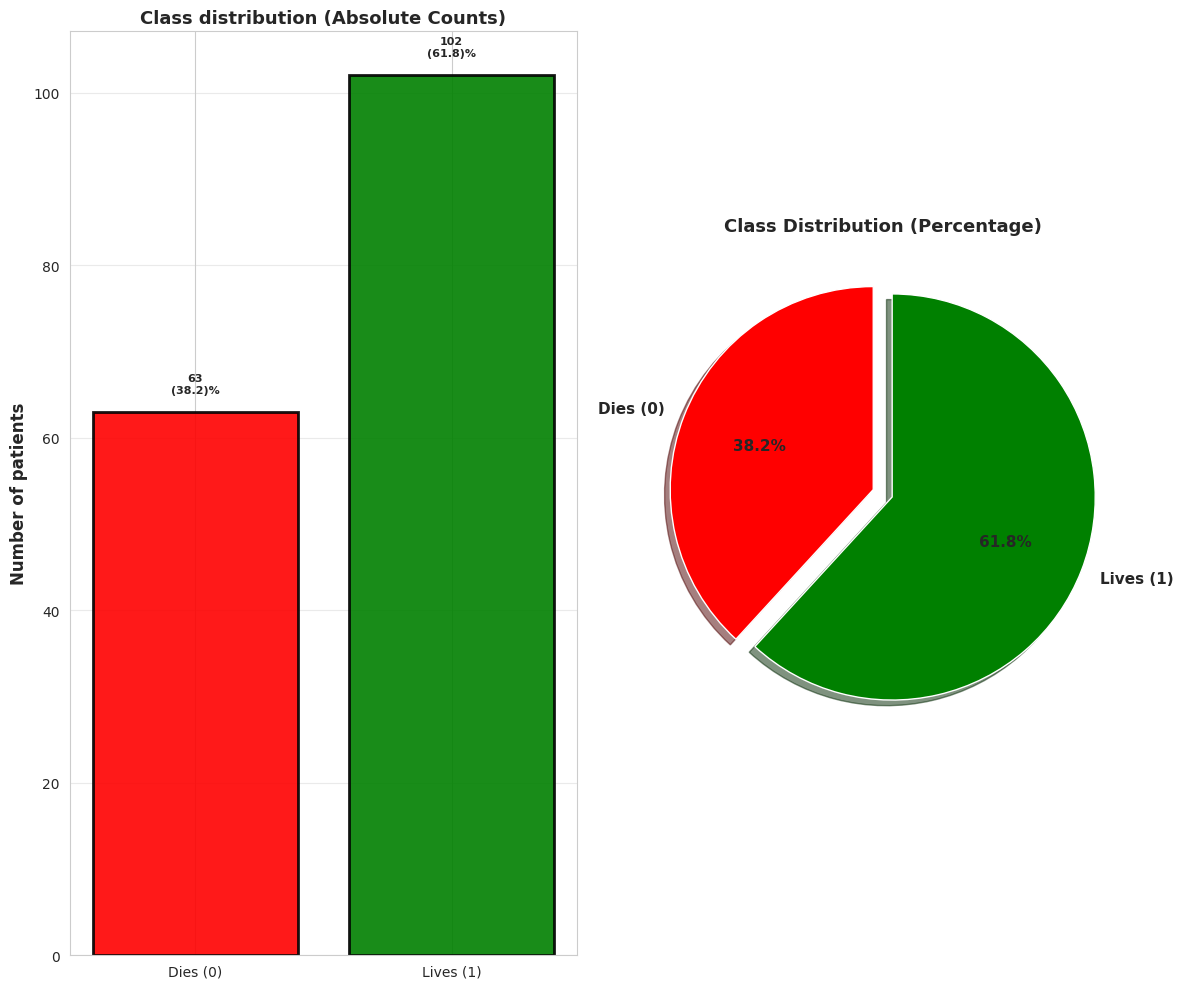

In [7]:
# Target variable analysis
print("=" * 60)
print("TARGET VARIABLE ANALYSIS: Class")
print("=" * 60)

# Basic Checks
print(f"\nBasic Information:")
print(f"    Data type: {df["Class"].dtype}")
print(f"    Unique values: {sorted(df["Class"].unique())}")
print(f"    Missing values: {df["Class"].isnull().sum()}")

# Class distribution
print("\n" + "=" * 60)
print("CLASS DISTRIBUTION")
print("=" * 60)

class_counts = df["Class"].value_counts().sort_index()

print(f"\nPercentages:")
for cls in sorted(df["Class"].unique()):
    count = class_counts[cls]
    pct = count / len(df) * 100
    label = "Dies" if cls == 0 else "Lives"
    print(f"    Class {cls} ({label:5s}): {count:3d} ({pct:5.2f}%)")
print(f"    Total:           {class_counts.sum()}")

# Imbalance ratio
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"\nClass Imbalance Analysis:")
print(f"    Ratio (Lives: Dies): {imbalance_ratio:.2f}:1")
print(f"    Expected: 102:63 =   1.62:1")

if abs(imbalance_ratio - 1.62) < 0.05:
    print(f"    Status: Matches expected distribution of target")
else:
    print(f"    Status: Differenct from expected distribution of target")

print()
# Visualisations

fig, axes = plt.subplots(1, 2, figsize = (12, 10))

# Colours: Red for Dies, Green for lives
colours = ["red", "green"]
labels = ["Dies (0)", "Lives (1)"]

# Bar plot
axes[0].bar(labels, class_counts.values, color = colours, alpha = 0.9, edgecolor = "black", 
            linewidth = 2)
axes[0].set_ylabel("Number of patients", fontsize = 12, fontweight = "bold")
axes[0].set_title("Class distribution (Absolute Counts)", fontsize = 13, fontweight = "bold")
axes[0].grid(axis = "y", alpha = 0.4)


for i, (idx, val) in enumerate(class_counts.items()):
    axes[0].text(i, val + 2, f"{val}\n({val / len(df) * 100:.1f})%", ha = "center", va = "bottom",
                 fontweight = "bold", fontsize = 8)

# Pie chart
axes[1].pie(class_counts.values, 
           labels = labels,
           autopct = "%.1f%%",
           colors = colours,
           explode = (0.05, 0.05),
           shadow = True,
           startangle = 90,
           textprops={"fontsize": 11, "fontweight": "bold"})
axes[1].set_title("Class Distribution (Percentage)", 
                 fontsize=13, fontweight = "bold")

plt.tight_layout()
plt.savefig("../figures/class_distribution.png", dpi = 300, bbox_inches = "tight")
plt.show()

In [8]:
print("=" * 60)
print("MISSING DATA ANALYSIS")
print("=" * 60)

print()

# Calculation of missing statistics for all columns
missing_stats = pd.DataFrame({
    "Column": df.columns,
    "Missing_Count": df.isnull().sum().values,
    "Missing_Percentage": (df.isnull().sum() / len(df) * 100).round(2).values,
    "Data_Type": df.dtypes.values,
    "Non_Missing": df.count().values
})

# Filter columns with missing data
cols_with_missing = missing_stats[missing_stats["Missing_Count"] > 0].sort_values(
    "Missing_Percentage", ascending = False)

print(f"Overall Summary:")
print(f"   Total features: {len(df.columns) - 1}")
print(f"   Features with missing data: {len(cols_with_missing)}")
print(f"   Features complete: {len(df.columns) - len(cols_with_missing) - 1}")
print(f"   Total missing values: {df.isnull().sum().sum():,}")
print(f"   Overall missing: {(df.isnull().sum().sum() / (nrows * ncols - nrows) * 100):.2f}%")
print()

# Complete patients
complete_patients = df.dropna()
print(f"Patient Completeness:")
print(f"   Patients with complete data: {len(complete_patients)} / {len(df)} ({len(complete_patients) / len(df) * 100:.2f}%)")
print(f"   Expected: 8 patients (4.85%)")

if len(cols_with_missing) > 0:
    print("\n" + "=" * 60)
    print(f"FEATURES WITH MISSING DATA")
    print("=" * 60)
    display(cols_with_missing)
    
    # Categorize by severity
    high_missing = cols_with_missing[cols_with_missing["Missing_Percentage"] > 40]
    medium_missing = cols_with_missing[
        (cols_with_missing["Missing_Percentage"] > 20) &
        (cols_with_missing["Missing_Percentage"] <= 40)
    ]
    low_missing = cols_with_missing[cols_with_missing["Missing_Percentage"] <= 20]

    print(f"\nHIGH Missingness (>40%): {len(high_missing)} features")
    if len(high_missing) > 0:
        for idx, row in high_missing.iterrows():
            print(f"   - {row['Column']}: {row['Missing_Percentage']:.1f}%")
    
    print(f"\nMEDIUM Missingness (20-40%): {len(medium_missing)} features")
    if len(medium_missing) > 0:
        for idx, row in medium_missing.iterrows():
            print(f"   - {row['Column']}: {row['Missing_Percentage']:.1f}%")
    
    print(f"\nLOW Missingness (<20%): {len(low_missing)} features")
    if len(low_missing) > 5:
        print(f"   ({len(low_missing)} features - showing top 5)")
        for idx, row in low_missing.head(5).iterrows():
            print(f"   - {row['Column']}: {row['Missing_Percentage']:.1f}%")
    else:
        for idx, row in low_missing.iterrows():
            print(f"   - {row['Column']}: {row['Missing_Percentage']:.1f}%")

else:
    print(f"\nNo missing data detected in the dataset")


MISSING DATA ANALYSIS

Overall Summary:
   Total features: 49
   Features with missing data: 44
   Features complete: 5
   Total missing values: 826
   Overall missing: 10.22%

Patient Completeness:
   Patients with complete data: 8 / 165 (4.85%)
   Expected: 8 patients (4.85%)

FEATURES WITH MISSING DATA


,Column,Missing_Count,Missing_Percentage,Data_Type,Non_Missing
48,Ferritin,80,48.480,float64,85
47,Sat,80,48.480,float64,85
46,Iron,79,47.880,float64,86
25,Packs_year,53,32.120,float64,112
17,Varices,52,31.520,float64,113
24,Grams_day,48,29.090,float64,117
45,Dir_Bil,44,26.670,float64,121
9,Smoking,41,24.850,float64,124
4,HBeAg,39,23.640,float64,126
8,Endemic,39,23.640,float64,126



HIGH Missingness (>40%): 3 features
   - Ferritin: 48.5%
   - Sat: 48.5%
   - Iron: 47.9%

MEDIUM Missingness (20-40%): 7 features
   - Packs_year: 32.1%
   - Varices: 31.5%
   - Grams_day: 29.1%
   - Dir_Bil: 26.7%
   - Smoking: 24.9%
   - HBeAg: 23.6%
   - Endemic: 23.6%

LOW Missingness (<20%): 34 features
   (34 features - showing top 5)
   - HBcAb: 14.6%
   - Hemochro: 13.9%
   - NASH: 13.3%
   - Major_Dim: 12.1%
   - Symptoms: 10.9%


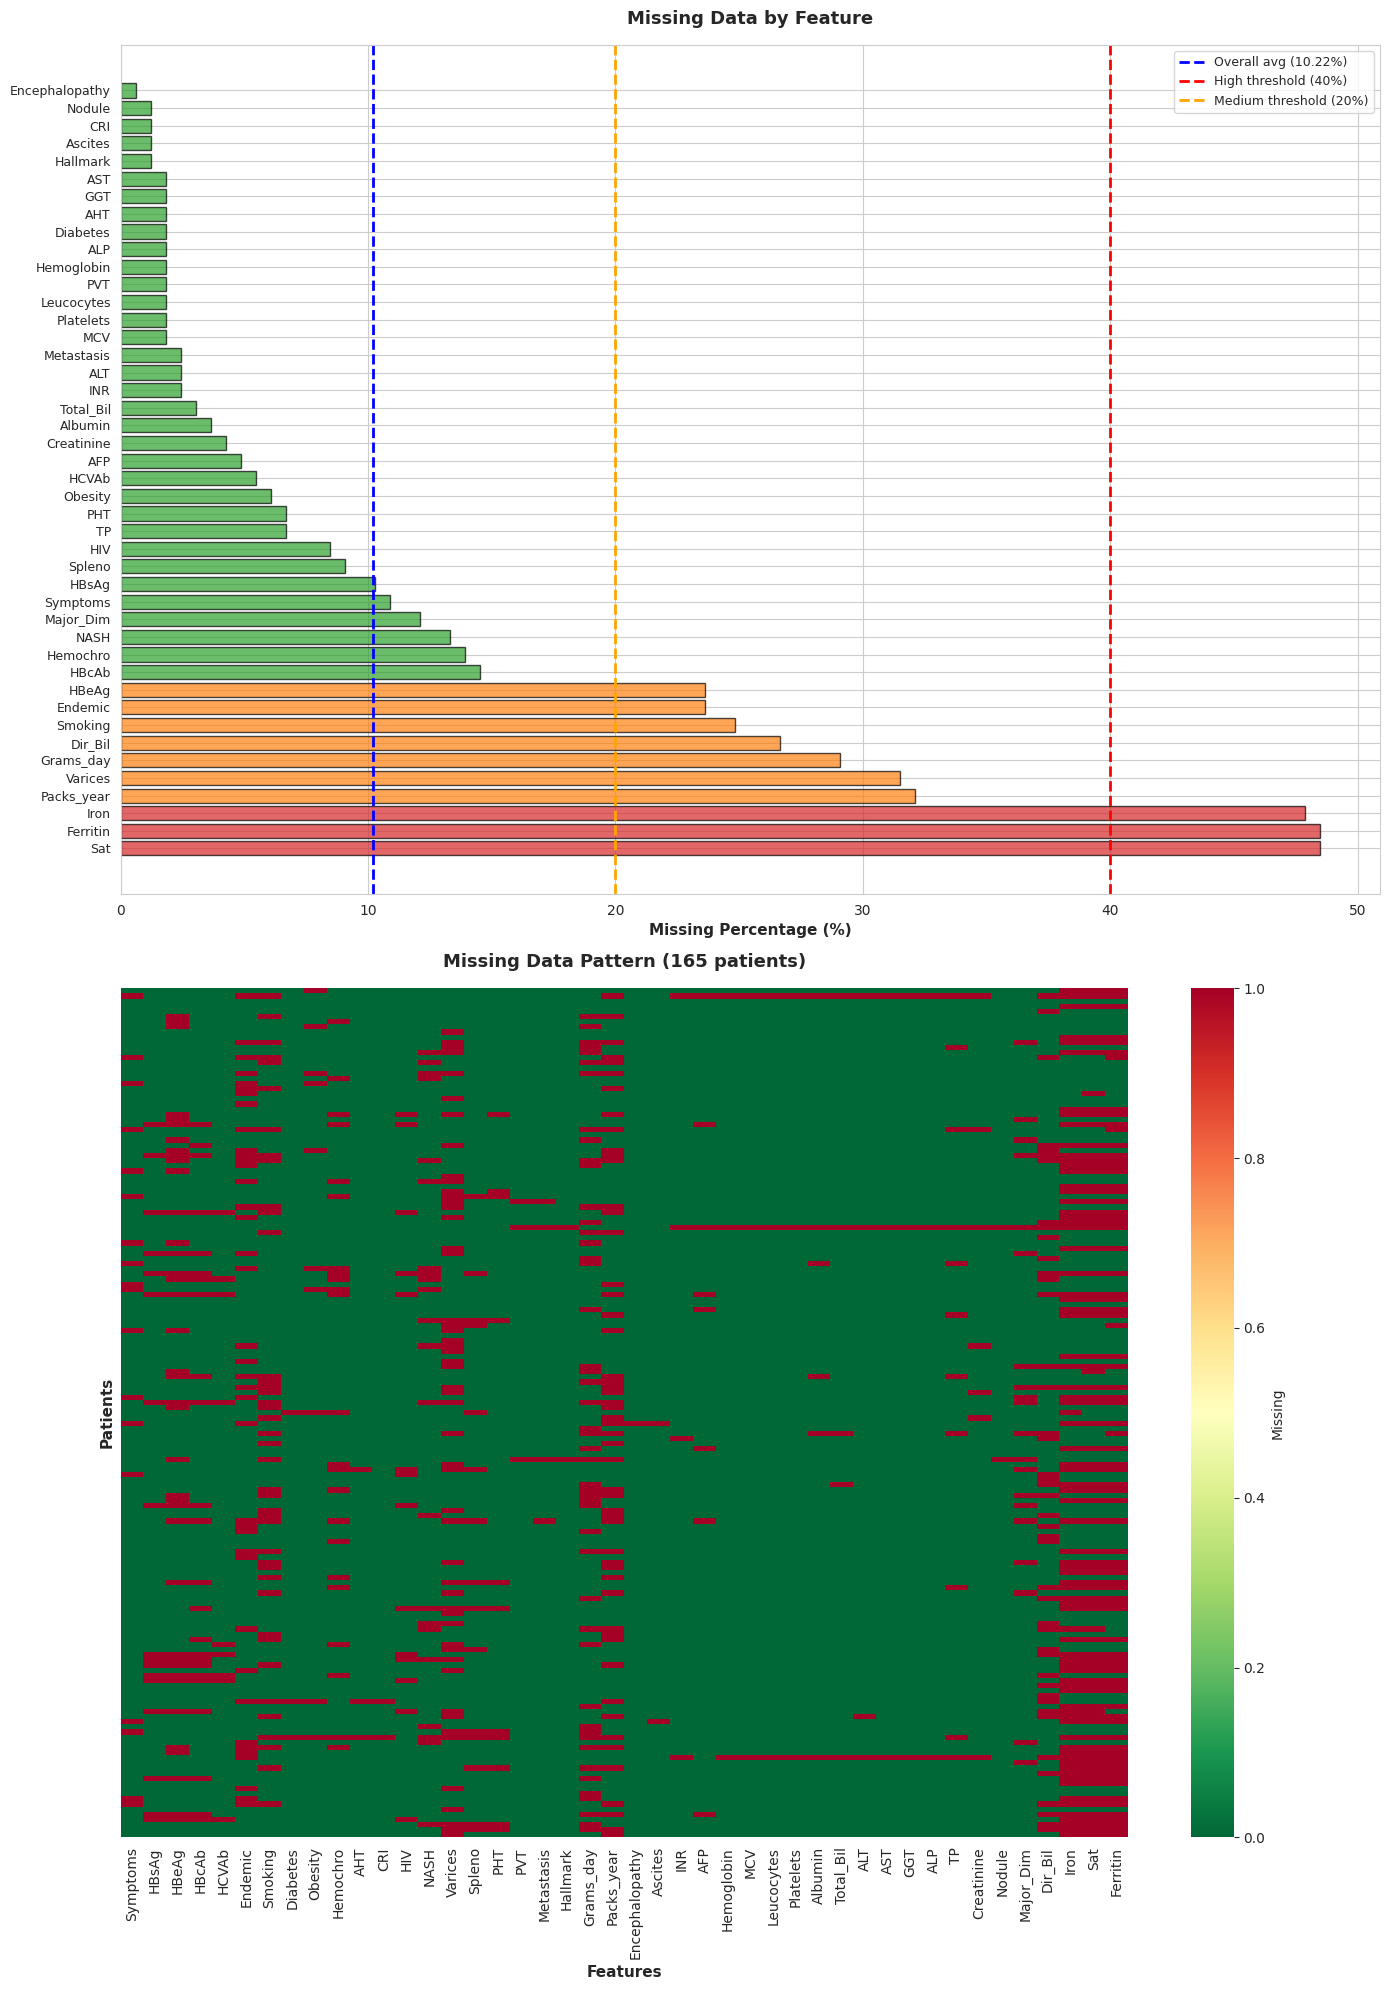


MISSING DATA PER PATIENT

Distribution:
    Minimum: 0 missing values
    Maximum: 23 missing values
    Mean:    5.0 missing values
    Median:  4.0 missing values

Patient categories:
    Complete (0 missing):    8 patients (4.8%)
    Low (1-5 missing):      99 patients (60.0%)
    Medium (6-10 missing):  49 patients (29.7%)
    High (>10 missing):      9 patients (5.5%)


In [9]:
# Missing data visualisation
if df.isnull().sum().sum() > 0:

    fig, axes = plt.subplots(2, 1, figsize = (14, 20))

    missing_pct_df = (df.isnull().sum() / len(df) * 100).sort_values(ascending = False)
    missing_pct_df = missing_pct_df[missing_pct_df > 0]

    colors_bar = ['#d62728' if x > 40 else '#ff7f0e' if x > 20 else '#2ca02c' 
                  for x in missing_pct_df.values]

    # Horizontal bar plot of missing percentages
    axes[0].barh(range(len(missing_pct_df)), missing_pct_df.values, 
                color=colors_bar, alpha=0.7, edgecolor='black')
    axes[0].set_yticks(range(len(missing_pct_df)))
    axes[0].set_yticklabels(missing_pct_df.index, fontsize = 9)
    axes[0].set_xlabel("Missing Percentage (%)", fontsize = 11, fontweight = "bold")
    axes[0].set_title("Missing Data by Feature", fontsize = 13, fontweight = "bold", pad = 15)
    axes[0].axvline(x = 10.22, color = "blue", linestyle = "--", linewidth = 2, 
                    label = "Overall avg (10.22%)")
    axes[0].axvline(x = 40, color = "red", linestyle = "--", linewidth = 2,
                    label = "High threshold (40%)")
    axes[0].axvline(x = 20, color = "orange", linestyle = "--", linewidth = 2,
                    label = "Medium threshold (20%)")
    axes[0].legend(loc = "upper right", fontsize = 9)

    
    # Heatmap of missing patterns
    cols_with_missing = df.columns[df.isnull().any()].tolist()
    
    if len(cols_with_missing) > 0:
        # Sample rows for visualization
        rows_with_missing = df[cols_with_missing]
        
        sns.heatmap(rows_with_missing.isnull(), 
                    cbar = True,
                    yticklabels = False,
                    cmap = "RdYlGn_r",
                    cbar_kws = {"label": "Missing"},
                    ax = axes[1])
        axes[1].set_title(f"Missing Data Pattern ({len(df)} patients)", 
                         fontsize = 13, fontweight = "bold", pad = 15)
        axes[1].set_xlabel("Features", fontsize = 11, fontweight = "bold")
        axes[1].set_ylabel(f"Patients", fontsize = 11, fontweight = "bold")

    plt.tight_layout()
    plt.savefig('../figures/missing_data_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

        # Missing per patient analysis
    missing_per_patient = df.isnull().sum(axis=1)
    
    print("\n" + "=" * 60)
    print("MISSING DATA PER PATIENT")
    print("=" * 60)
    print(f"\nDistribution:")
    print(f"    Minimum: {missing_per_patient.min()} missing values")
    print(f"    Maximum: {missing_per_patient.max()} missing values")
    print(f"    Mean:    {missing_per_patient.mean():.1f} missing values")
    print(f"    Median:  {missing_per_patient.median():.1f} missing values")

    # Count patients by completeness
    complete_count = (missing_per_patient == 0).sum()
    low_missing = ((missing_per_patient > 0) & (missing_per_patient <= 5)).sum()
    med_missing = ((missing_per_patient > 5) & (missing_per_patient <= 10)).sum()
    high_missing = (missing_per_patient > 10).sum()

    print(f"\nPatient categories:")
    print(f"    Complete (0 missing):  {complete_count:3d} patients ({complete_count / len(df) * 100:.1f}%)")
    print(f"    Low (1-5 missing):     {low_missing:3d} patients ({low_missing / len(df) * 100:.1f}%)")
    print(f"    Medium (6-10 missing): {med_missing:3d} patients ({med_missing / len(df) * 100:.1f}%)")
    print(f"    High (>10 missing):    {high_missing:3d} patients ({high_missing / len(df) * 100:.1f}%)")
    
else:
    print("No missing data to visualize!")
    

In [10]:
# Statistical summary of numeric features
print("=" * 60)
print("NUMERICAL FEATURES SUMMARY")
print("=" * 60)

# Get numeric columns
numeric_cols = df.select_dtypes(include = [np.number]).columns.tolist()

print(f"\nNumeric Features: {len(numeric_cols)}/{len(df.columns)}")
print(f"    (Remaining {len(df.columns) - len(numeric_cols)} are categorical/binary)")
print(f" All columns are numeric: has to be changed later")

# Summary statistics
print("\n" + "=" * 60)
print("DESCRIPTIVE STATISTICS (Numeric Features)")
print("=" * 60)

summary = df[numeric_cols].describe().T
summary["missing"] = df[numeric_cols].isnull().sum()
summary["missing_pct"] =  (summary["missing"] / len(df) * 100).round(2)

summary = summary[["count", "missing", "missing_pct",
                   "mean", "std", "min", "25%", "50%", "75%", "max"]]

display(summary.head(15))

# Key observations
print("\n" + "=" * 60)
print("KEY OBSERVATIONS FROM NUMERIC SUMMARY")
print("=" * 60)

print(f"\n1. Age:")
print(f"    Range: {df["Age"].min():.0f} to {df["Age"].max():.0f} years")
print(f"    Mean: {df["Age"].mean():.1f} years")

print(f"\n2. Target variable (Class):")
print(f"   Values: {sorted(df["Class"].dropna().unique())}")

print(f"\n3. Performance Status (PS):")
print(f"   Range: {df["PS"].min():.0f} to {df["PS"].max():.0f}")

print(f"\n4. Lab values - sample ranges:")
print(f"   AFP (tumor marker): {df["AFP"].min():.1f} to {df["AFP"].max():.1f} ng/mL")
print(f"   Hemoglobin: {df["Hemoglobin"].min():.1f} to {df["Hemoglobin"].max():.1f} g/dL")
print(f"   ALT: {df["ALT"].min():.0f} to {df["ALT"].max():.0f} U/L")


NUMERICAL FEATURES SUMMARY

Numeric Features: 50/50
    (Remaining 0 are categorical/binary)
 All columns are numeric: has to be changed later

DESCRIPTIVE STATISTICS (Numeric Features)


,count,missing,missing_pct,mean,std,min,25%,50%,75%,max
Gender,165.000,0,0.000,0.806,0.397,0.000,1.000,1.000,1.000,1.000
Symptoms,147.000,18,10.910,0.639,0.482,0.000,0.000,1.000,1.000,1.000
Alcohol,165.000,0,0.000,0.739,0.440,0.000,0.000,1.000,1.000,1.000
HBsAg,148.000,17,10.300,0.108,0.312,0.000,0.000,0.000,0.000,1.000
HBeAg,126.000,39,23.640,0.008,0.089,0.000,0.000,0.000,0.000,1.000
HBcAb,141.000,24,14.550,0.270,0.445,0.000,0.000,0.000,1.000,1.000
HCVAb,156.000,9,5.450,0.218,0.414,0.000,0.000,0.000,0.000,1.000
Cirrhosis,165.000,0,0.000,0.903,0.297,0.000,1.000,1.000,1.000,1.000
Endemic,126.000,39,23.640,0.079,0.271,0.000,0.000,0.000,0.000,1.000
Smoking,124.000,41,24.850,0.508,0.502,0.000,0.000,1.000,1.000,1.000



KEY OBSERVATIONS FROM NUMERIC SUMMARY

1. Age:
    Range: 20 to 93 years
    Mean: 64.7 years

2. Target variable (Class):
   Values: [0, 1]

3. Performance Status (PS):
   Range: 0 to 4

4. Lab values - sample ranges:
   AFP (tumor marker): 1.2 to 1810346.0 ng/mL
   Hemoglobin: 5.0 to 18.7 g/dL
   ALT: 11 to 420 U/L


In [11]:
# Important data validation checks

print("=" * 60)
print("DATA QUALITY VALIDATION CHECKS")
print("=" * 60)

print("""Purpose: Systematically verify data against expected ranges and constraints.
This catches data entry errors, impossible values, and integrity issues early.
""")

validation_issues = [] # To collect any issues found during validation

# Check 1: Quantitative Values Range Validation (more specifically, non-negativeness)
print("=" * 60)
print("Check 1: Quantitative Values Range Validation")
print("=" * 60)

print("Checking for negative values in non-negative features...")
nonnegative_features = {
    "Grams_day": "grams alcohol/day",
    "Packs_year": "cigarette packs/year",
    "INR": "",
    "AFP": "ng/mL",
    "Hemoglobin": "g/dL",
    "MCV": "fL",
    "Leucocytes": "G/L",
    "Platelets": "G/L",
    "Albumin": "mg/dL",
    "Total_Bil": "mg/dL",
    "ALT": "U/L",
    "AST": "U/L",
    "GGT": "U/L",
    "ALP": "U/L",
    "TP": "g/dL",
    "Creatinine": "mg/dL",
    "Major_Dim": "cm",
    "Dir_Bil": "mg/dL",
    "Iron": "mcg/dL",
    "Sat": "%",
    "Ferritin": "ng/mL"
}

nonnegative_issues = []
for feature, unit in nonnegative_features.items():
    if feature in df.columns:
        min_val = df[feature].dropna().min()
        if min_val < 0:
            nonnegative_issues.append(f"    {feature}: min = {min_val:.2f} {unit} (should be >= 0)")
    else:
        nonnegative_issues.append(f"    {feature} not found in dataset")

if len(nonnegative_issues) == 0:
    print(f"    Status: No negative values detected in {len(nonnegative_features)} quantitative features")
else:
    print(f"    Issues detected in quantitative features:")
    for issue in nonnegative_issues:
        print(issue)
    validation_issues.extend(nonnegative_issues)

# Check 2: Binary variables check (should only contain 0 and 1)
print("\n" + "=" * 60)
print("Check 2: Binary Variables Check")
print("=" * 60)

print("Checking binary features for valid values (0 and 1 only)...")

binary_features = ["Gender", "Symptoms", "Alcohol", "HBsAg", "HBeAg", "HBcAb", "HCVAb",
                   "Cirrhosis", "Endemic", "Smoking", "Diabetes", "Obesity", "Hemochro",
                   "AHT", "CRI", "HIV", "NASH", "Varices", "Spleno", "PHT", "PVT", "Metastasis",
                   "Hallmark"] # Exclusion of "Class" as it has already been analysed above

binary_issues = []
for feature in binary_features:
    if feature in df.columns:
        unique_values = df[feature].dropna().unique()
        # Check if only 0 or 1 are in the feature column
        unique_set = set(unique_values)
        # Convert to set of floats for comparison (to handle cases where values are stored as floats)
        unique_set_float = {float(x) for x in unique_set}
        expected_set = {0.0, 1.0}
        # Check if the unique values are a subset of the expected binary set
        if not unique_set_float.issubset(expected_set):
            print(f"    Issue: {feature} contains non-binary values: {unique_set_float}")
            binary_issues.append(feature)
    else:
        print(f"    Warning: {feature} not found in dataset columns")
        binary_issues.append(f"{feature} not found in dataset")

if len(binary_issues) == 0:
    print(f"    Status: All {len(binary_features)} binary features contain only 0 and 1 values")
else:
    print(f"    {len(binary_issues)} issues detected in binary features:")
    for issue in binary_issues:
        print(f"    - {issue}")
    validation_issues.extend(binary_issues)



# Check 3: Ordinal variables check

print("\n" + "=" * 60)
print("Check 3: Ordinal Variables Check")
print("=" * 60)

print("Checking ordinal features for expected value ranges...")

ordinal_checks = {
    "PS": (0, 4, "Performance Status (0 = Active , 4 = Disabled)"),
    "Encephalopathy": (1, 3, "Encephalopathy degree (1 = None, 3 = Grade III/IV)"),
    "Ascites": (1, 3, "Ascites degree (1 = None, 3 = Severe)")
}

ordinal_issues = []
for feature, (min_exp, max_exp, desc) in ordinal_checks.items():
    if feature in df.columns:
        unique_values = df[feature].dropna().unique()
        min_obs = unique_values.min()
        max_obs = unique_values.max()
        if min_obs < min_exp or max_obs > max_exp:
            ordinal_issues.append(f"    {feature}: expected range {min_exp}-{max_exp} ({desc}), but observed range is {min_obs}-{max_obs}")
    else:
        ordinal_issues.append(f"    {feature} not found in dataset")

if len(ordinal_issues) == 0:
    print(f"    Status: All {len(ordinal_checks)} ordinal features are within expected ranges")
else:
    print(f"    Issues detected in ordinal features:")
    for issue in ordinal_issues:
        print(issue)
    validation_issues.extend(ordinal_issues)

# Final summary of validation checks

print("\n" + "=" * 60)
print("Validation Summary")
print("=" * 60)

if len(validation_issues) == 0:
    print(f"All data quality validation checks passed successfully!")
else:
    print(f"{len(validation_issues)} issues detected during data validation:")
    for idx, issue in enumerate(validation_issues, start = 1):
        print(f"    {idx}. {issue}")

DATA QUALITY VALIDATION CHECKS
Purpose: Systematically verify data against expected ranges and constraints.
This catches data entry errors, impossible values, and integrity issues early.

Check 1: Quantitative Values Range Validation
Checking for negative values in non-negative features...
    Status: No negative values detected in 21 quantitative features

Check 2: Binary Variables Check
Checking binary features for valid values (0 and 1 only)...
    Status: All 23 binary features contain only 0 and 1 values

Check 3: Ordinal Variables Check
Checking ordinal features for expected value ranges...
    Status: All 3 ordinal features are within expected ranges

Validation Summary
All data quality validation checks passed successfully!


In [12]:
# Quick summary of key findings from validation checks
print("=" * 60)
print("KEY FINDINGS FROM VALIDATION CHECKS")
print("=" * 60)

print(f"""
✅ DATASET VERIFIED
   - 165 patients x 50 features (original dataset)
   - Class distribution: {df['Class'].value_counts().sort_index().to_dict()}
   - Missing data: ~{(df.isnull().sum().sum() / (df.shape[0] * df.shape[1] - df.shape[0]) * 100):.1f}%

⚠️  ISSUES IDENTIFIED
   1. Data Type Problem: Binary and categorical features (Gender, Cirrhosis, etc.) 
      stored as numeric -> Need to convert to categorical type
   2. Column Naming: 'Nodule' should be 'Nodules' (per documentation)
   3. Missing Data Patterns: Iron/Ferritin/Sat ~48% missing (MNAR)

✅ DATA QUALITY
   - Age range: {df['Age'].min():.0f}-{df['Age'].max():.0f} years 
   - Binary variables contain only 0/1 
   - No critical errors detected

📋 NEXT STEPS
   1. Create src/data_utils.py with proper data loading functions
   2. Fix data types (categorical vs numeric)
   3. Standardize column names
   4. Proceed to comprehensive EDA
""")

KEY FINDINGS FROM VALIDATION CHECKS

✅ DATASET VERIFIED
   - 165 patients x 50 features (original dataset)
   - Class distribution: {0: 63, 1: 102}
   - Missing data: ~10.2%

⚠️  ISSUES IDENTIFIED
   1. Data Type Problem: Binary and categorical features (Gender, Cirrhosis, etc.) 
      stored as numeric -> Need to convert to categorical type
   2. Column Naming: 'Nodule' should be 'Nodules' (per documentation)
   3. Missing Data Patterns: Iron/Ferritin/Sat ~48% missing (MNAR)

✅ DATA QUALITY
   - Age range: 20-93 years 
   - Binary variables contain only 0/1 
   - No critical errors detected

📋 NEXT STEPS
   1. Create src/data_utils.py with proper data loading functions
   2. Fix data types (categorical vs numeric)
   3. Standardize column names
   4. Proceed to comprehensive EDA



---

# 📝 Initial Inspection Complete

## Issues Found
1. **Data types need fixing**: Binary and categorical features stored as numeric
2. **Column naming**: Minor inconsistencies (e.g., Nodule vs Nodules)
3. **Missing data patterns**: Identified and documented (~10% overall)

## Validated
- ✅ 165 patients, 50 features
- ✅ Class balance: 63:102 (Dies:Lives)
- ✅ No critical data entry errors
- ✅ Age range and lab values plausible

## Next Session
Create `src/data_utils.py` to handle:
- Proper data type conversion
- Column name standardization
- Consistent data loading for all future notebooks

---

**Status:** Ready to create utilities and proceed to EDA